# Data analysis & pre-processing part

In [1]:
import pandas as pd
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [3]:
train=train.drop(['Unnamed: 0','id'],axis=1)
test=test.drop(['Unnamed: 0','id'],axis=1)

In [4]:
train.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [5]:
test.isnull().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

In [6]:
import numpy as np
from sklearn.impute import SimpleImputer

data_list=[train,test]

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
for dt in data_list:
    imp = imp.fit(dt[['Arrival Delay in Minutes']])
    dt['Arrival Delay in Minutes'] = imp.transform(dt[['Arrival Delay in Minutes']])
train.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

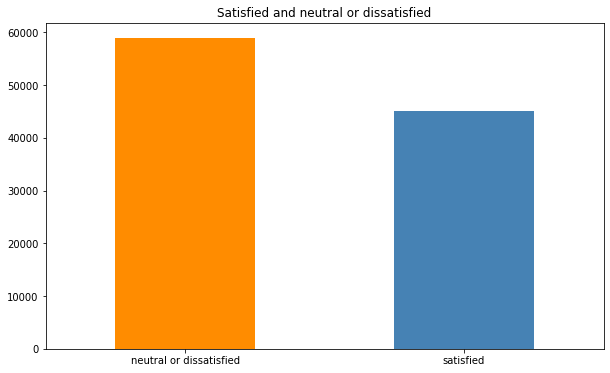

In [7]:
import matplotlib.pyplot as plt 

plt.figure(figsize = (10,6))
train.satisfaction.value_counts().plot(kind='bar', color= ['darkorange','steelblue'], rot=0)
plt.title('Satisfied and neutral or dissatisfied')
plt.show()

<AxesSubplot:title={'center':'Gender'}, xlabel='satisfaction'>

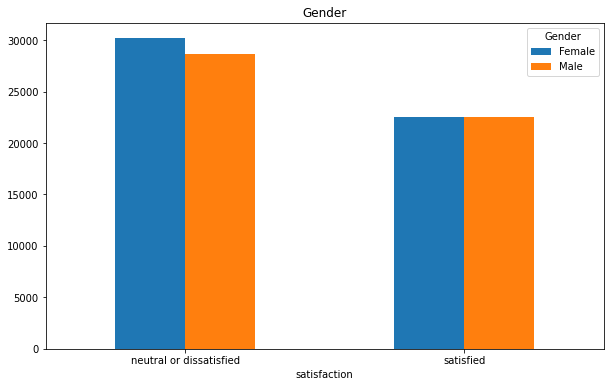

In [8]:
class_df = train.groupby(['satisfaction','Gender'])['satisfaction'].count().unstack('Gender')
class_df.plot(figsize=(10,6),title='Gender',kind='bar',rot=0)

<AxesSubplot:title={'center':'Customer Type'}, xlabel='satisfaction'>

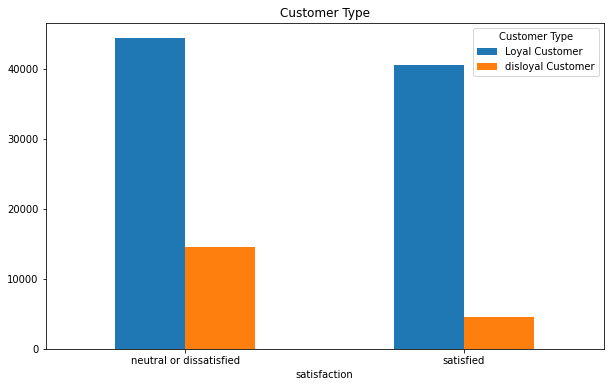

In [9]:
class_df = train.groupby(['satisfaction','Customer Type'])['satisfaction'].count().unstack('Customer Type')
class_df.plot(figsize=(10,6),title='Customer Type',kind='bar',rot=0)

<AxesSubplot:title={'center':'Type of Travel'}, xlabel='satisfaction'>

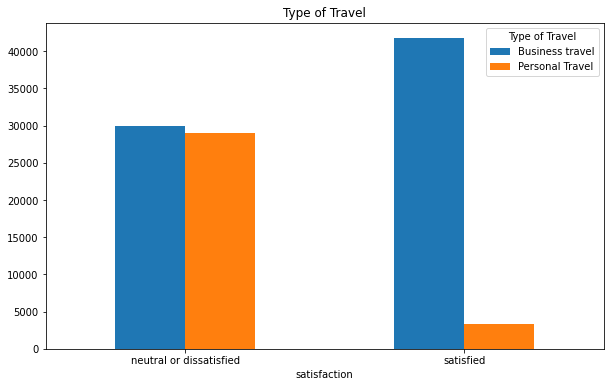

In [10]:
class_df = train.groupby(['satisfaction','Type of Travel'])['satisfaction'].count().unstack('Type of Travel')
class_df.plot(figsize=(10,6),title='Type of Travel',kind='bar',rot=0)

<AxesSubplot:title={'center':'Class'}, xlabel='satisfaction'>

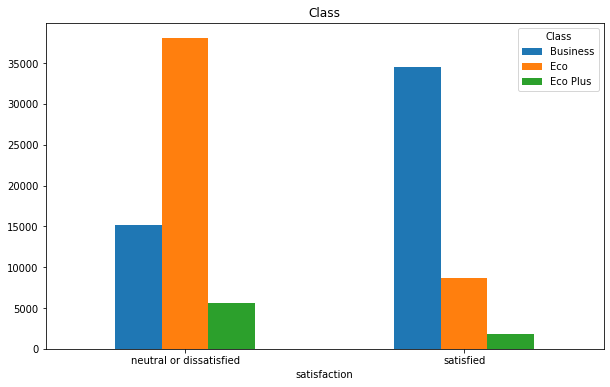

In [11]:
class_df = train.groupby(['satisfaction','Class'])['satisfaction'].count().unstack('Class')
class_df.plot(figsize=(10,6),title='Class',kind='bar',rot=0)

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for dt in data_list:
  for i in dt.columns.values.tolist():
    if type(dt[i][0])==str:
      dt[i] = le.fit_transform(dt[i])
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  int64  
 1   Customer Type                      103904 non-null  int64  
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  int64  
 4   Class                              103904 non-null  int64  
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

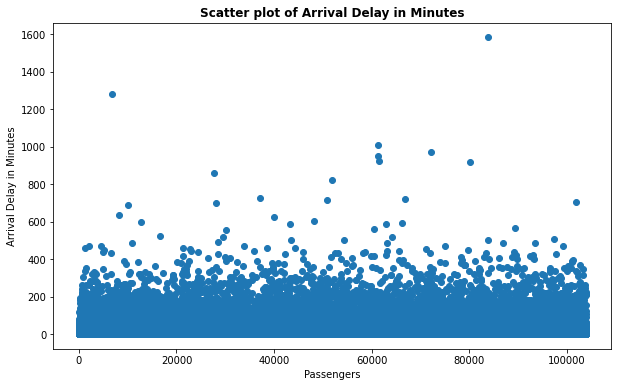

In [13]:
plt.figure(figsize=(10,6))
xx=np.linspace(0,len(train),len(train))
plt.scatter(xx, train['Arrival Delay in Minutes'])
plt.xlabel('Passengers')
plt.ylabel('Arrival Delay in Minutes')
plt.title('Scatter plot of Arrival Delay in Minutes',fontweight='bold')
plt.show()

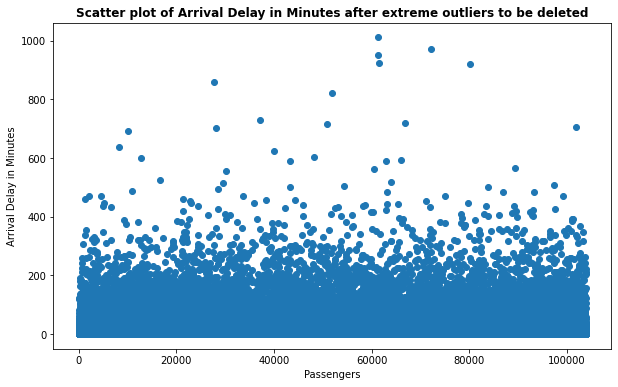

In [14]:
train = train[train['Arrival Delay in Minutes'] <= 1200]

plt.figure(figsize=(10,6))
xx=np.linspace(0,len(train),len(train))
plt.scatter(xx, train['Arrival Delay in Minutes'])
plt.xlabel('Passengers')
plt.ylabel('Arrival Delay in Minutes')
plt.title('Scatter plot of Arrival Delay in Minutes after extreme outliers to be deleted',fontweight='bold')
plt.show()

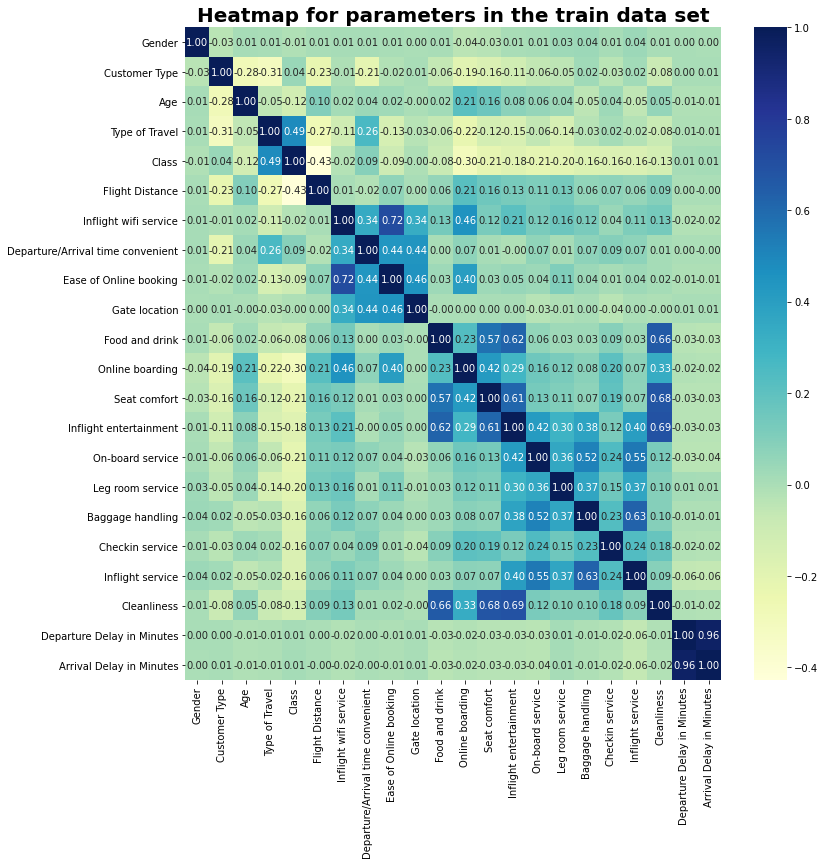

In [15]:
import seaborn as sns
plt.figure(figsize=(12,12))
list_columns=train.drop('satisfaction',axis=1).columns.values.tolist()
sns.heatmap(train[list_columns].corr(),annot=True,fmt=".2f",cmap='YlGnBu')
plt.title('Heatmap for parameters in the train data set',fontweight='bold',fontsize=20)
# plt.xticks(rotation=70)
plt.show()

# Machine learning part

In [16]:
# #dataset
y_train=train["satisfaction"]
x_train=train.drop(["satisfaction"],axis=1)
y_test=test["satisfaction"]
x_test=test.drop(["satisfaction"],axis=1)

In [17]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100,max_depth=None,min_samples_split=2,random_state=8)
clf.fit(x_train,y_train)
acc_rfc= (clf.score(x_test,y_test),'RandomForestClassifier')
print(f"Accuracy of RandomForestClassifier: {round(acc_rfc[0],4)}")

Accuracy of RandomForestClassifier: 0.9631


In [18]:
from sklearn.ensemble import RandomForestRegressor
clf2=RandomForestRegressor(n_estimators=100,max_depth=None,min_samples_split=2,random_state=8)
clf2.fit(x_train,y_train)
acc_rfr= (clf2.score(x_test,y_test),'RandomForestRegressor')
print(f"Accuracy of RandomForestRegressor: {round(acc_rfr[0],4)}")

Accuracy of RandomForestRegressor: 0.8864


In [19]:
from sklearn.ensemble import ExtraTreesClassifier
clf3=ExtraTreesClassifier(n_estimators=100,max_depth=None,min_samples_split=2,random_state=8)
clf3.fit(x_train,y_train)
acc_etc = (clf3.score(x_test,y_test),'ExtraTreesClassifier')
print(f"Accuracy of ExtraTreeClassifier: {round(acc_etc[0],4)}")

Accuracy of ExtraTreeClassifier: 0.9625


In [20]:
from sklearn.ensemble import ExtraTreesRegressor
clf4=ExtraTreesRegressor(n_estimators=100,max_depth=None,min_samples_split=2,random_state=8)
clf4.fit(x_train,y_train)
acc_etr = (clf4.score(x_test,y_test),'ExtraTreesRegressor')
print(f"Accuracy of ExtraTreeRegressor: {round(acc_etr[0],4)}")

Accuracy of ExtraTreeRegressor: 0.8945


In [21]:
from sklearn.ensemble import AdaBoostClassifier
clf5=AdaBoostClassifier(n_estimators=100,random_state=8)
clf5.fit(x_train,y_train)
acc_abc = (clf5.score(x_test,y_test),'AdaBoostClassifier')
print(f"Accuracy of AdaBoostClassifier: {round(acc_abc[0],4)}")

Accuracy of AdaBoostClassifier: 0.929


In [22]:
from sklearn.ensemble import AdaBoostRegressor
clf6=AdaBoostRegressor(n_estimators=100,random_state=8)
clf6.fit(x_train,y_train)
acc_abr = (clf6.score(x_test,y_test),'AdaBoostRegressor')
print(f"Accuracy of AdaBoostRegressor: {round(acc_abr[0],4)}")

Accuracy of AdaBoostRegressor: 0.6134


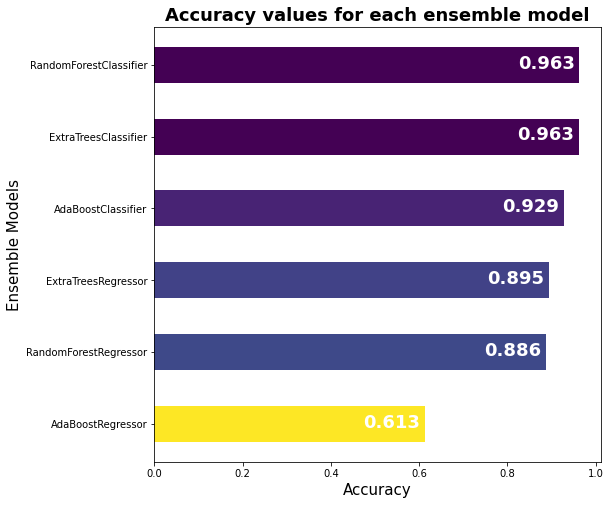

In [23]:
all_models=[acc_rfc,acc_rfr,acc_etc,acc_etr,acc_abc,acc_abr]
all_models=sorted(all_models,key=lambda x:x[0])

accuracy_values=[x[0] for x in all_models]
models=[x[1] for x in all_models]

plt.figure(figsize=(8,8))
my_cmap = plt.get_cmap("viridis").reversed()
rescale = lambda y: (y-np.min(y)) / (np.max(y) - np.min(y))
plt.barh(models,accuracy_values,height=0.5,align='center', color=my_cmap(rescale(accuracy_values)))
for i, v in enumerate(accuracy_values):
    plt.text(v-0.14,i-.05,str(round(v,3)),color='white',fontsize=18,fontweight='bold')
plt.ylabel('Ensemble Models',fontsize=15)
plt.xlabel('Accuracy',fontsize=15)
plt.title('Accuracy values for each ensemble model',fontsize=18,fontweight='bold')
plt.show()

In [24]:
dic=dict(zip(x_train.columns,clf.feature_importances_))
for item in sorted(dic.items(), key=lambda x: x[1], reverse=True):
    print(item[0],round(item[1],4))

Online boarding 0.1616
Inflight wifi service 0.1418
Class 0.1081
Type of Travel 0.0955
Inflight entertainment 0.0602
Seat comfort 0.0463
Flight Distance 0.0409
Ease of Online booking 0.0382
Leg room service 0.0363
Customer Type 0.0359
On-board service 0.035
Age 0.0323
Checkin service 0.0248
Baggage handling 0.0243
Inflight service 0.0232
Cleanliness 0.0212
Departure/Arrival time convenient 0.0186
Gate location 0.0165
Arrival Delay in Minutes 0.0122
Food and drink 0.0112
Departure Delay in Minutes 0.0112
Gender 0.0046


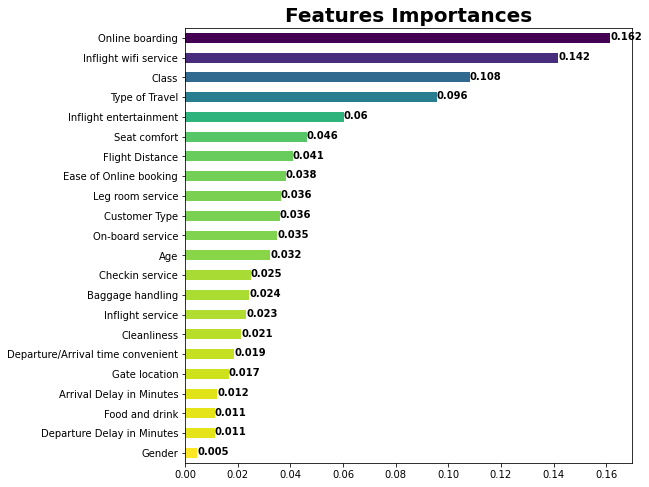

In [25]:
importances_sorted = pd.Series(data=clf.feature_importances_,index= x_train.columns).sort_values()
plt.figure(figsize=(8,8))
importances_sorted.plot(kind='barh',color=my_cmap(rescale(importances_sorted)))
for i, v in enumerate(importances_sorted):
    plt.text(v,i-.1,str(round(v,3)),color='black',fontweight='bold')
plt.title('Features Importances',fontweight='bold',fontsize=20)
plt.show()